In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('/content/clinical_notes_diagnosis_prediction_5000.csv')
df.head()

,Clinical Notes,Diagnosis
0,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
1,A 55-year-old male with a history of heavy alc...,Liver Cirrhosis
2,A 50-year-old male with a history of diabetes ...,Septic Shock
3,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
4,A 55-year-old female with a history of obesity...,Type 2 Diabetes Mellitus


In [3]:
df['Clinical Notes'][0]

'A 35-year-old male presents with heartburn, regurgitation, and a sour taste in his mouth, especially after meals. The patient has been self-medicating with over-the-counter antacids, but the symptoms persist. A 24-hour pH monitoring test confirms the diagnosis of GERD. The patient is started on a PPI and advised to avoid trigger foods.'

In [4]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
Peptic Ulcer Disease,284
Type 2 Diabetes Mellitus,283
Acute Myocardial Infarction,272
Chronic Obstructive Pulmonary Disease,269
Cerebrovascular Accident,263
Deep Vein Thrombosis,260
Community-Acquired Pneumonia,251
Chronic Kidney Disease,251
Septic Shock,246


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Clinical Notes  5000 non-null   object
 1   Diagnosis       5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [6]:
df.isnull().sum()

,0
Clinical Notes,0
Diagnosis,0


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def clean_text(txt):
  text = str(txt).lower()
  text = re.sub(r"\d+",' ',text)
  text = re.sub(r'[^a-z\s]',' ',text)
  text = re.sub(r'\s+',' ',text).strip()
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

In [9]:
clean_text('jwhhed@@@6119')

'jwhhed'

In [10]:
txt = df['Clinical Notes'][0]
txt

'A 35-year-old male presents with heartburn, regurgitation, and a sour taste in his mouth, especially after meals. The patient has been self-medicating with over-the-counter antacids, but the symptoms persist. A 24-hour pH monitoring test confirms the diagnosis of GERD. The patient is started on a PPI and advised to avoid trigger foods.'

In [11]:
clean_text(txt)

'year old male presents heartburn regurgitation sour taste mouth especially meals patient self medicating counter antacids symptoms persist hour ph monitoring test confirms diagnosis gerd patient started ppi advised avoid trigger foods'

In [12]:
df['Clinical Notes'] = df['Clinical Notes'].apply(clean_text)

In [13]:
df.head()

,Clinical Notes,Diagnosis
0,year old male presents heartburn regurgitation...,Gastroesophageal Reflux Disease
1,year old male history heavy alcohol use presen...,Liver Cirrhosis
2,year old male history diabetes presents hypote...,Septic Shock
3,year old male presents heartburn regurgitation...,Gastroesophageal Reflux Disease
4,year old female history obesity hypertension p...,Type 2 Diabetes Mellitus


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [15]:
df.head()

,Clinical Notes,Diagnosis
0,year old male presents heartburn regurgitation...,9
1,year old male history heavy alcohol use presen...,11
2,year old male history diabetes presents hypote...,16
3,year old male presents heartburn regurgitation...,9
4,year old female history obesity hypertension p...,18


In [16]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(df['Clinical Notes'], df['Diagnosis'], test_size=0.2)

In [17]:
# Tokenization using BERT tokenizer
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


train_encodings = tokenizer(list(train_texts), padding=True, truncation=True, max_length=512)
test_encodings = tokenizer(list(test_texts), padding=True, truncation=True, max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [18]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [19]:

# Convert to Dataset format
from datasets import Dataset

train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask'], 'labels': train_labels.tolist()})
test_dataset = Dataset.from_dict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask'], 'labels': test_labels.tolist()})

In [20]:
train_dataset[0]

{'input_ids': [101,
  2095,
  2214,
  3287,
  2146,
  2381,
  9422,
  7534,
  13318,
  19340,
  2460,
  2791,
  3052,
  4311,
  4788,
  5582,
  8030,
  2627,
  2095,
  3391,
  16956,
  7749,
  1059,
  21030,
  6774,
  3264,
  11192,
  17151,
  10841,
  24458,
  3508,
  7657,
  10548,
  3052,
  4165,
  3108,
  1060,
  4097,
  7657,
  23760,
  2378,
  10258,
  3370,
  8948,
  21908,
  3853,
  5852,
  12210,
  11616,
  8872,
  2094,
  5776,
  2318,
  22953,
  12680,
  7716,
  11733,
  6591,
  2522,
  28228,
  13186,
  3334,
  17086,
  102,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0],
 'labels': 5}

In [21]:
# Load model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(le.classes_))

# Set training arguments with improvements
training_args = TrainingArguments(
    output_dir="./results",          # Output directory for results
    evaluation_strategy="epoch",     # Evaluate once per epoch
    save_strategy="epoch",          # Save model at the end of each epoch to match evaluation strategy
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=5,              # Increase number of epochs
    weight_decay=0.01,               # Strength of weight decay
    logging_dir="./logs",            # Directory for logging
    logging_steps=10,                # Log every 10 steps
    lr_scheduler_type="linear",      # Use linear learning rate scheduler with warmup
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    load_best_model_at_end=True,     # Load the best model at the end of training
    metric_for_best_model="eval_loss", # Monitor eval loss to determine the best model
    save_total_limit=3,              # Limit the number of checkpoints to save
    gradient_accumulation_steps=2    # Simulate larger batch size if GPU memory is limited
)
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Fine-tuning the model
trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,2.354000,2.129219
2,0.877200,0.678591
3,0.159500,0.102448
4,0.022400,0.015937
5,0.014100,0.010203


TrainOutput(global_step=625, training_loss=0.9577597161889077, metrics={'train_runtime': 477.6906, 'train_samples_per_second': 41.868, 'train_steps_per_second': 1.308, 'total_flos': 668163381600000.0, 'train_loss': 0.9577597161889077, 'epoch': 5.0})

In [22]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




In [23]:
predictions,labels,_ = trainer.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        56
           9       1.00      1.00      1.00        53
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        44
          13       1.00      1.00      1.00        52
          14       1.00      1.00      1.00        49
          15       1.00      1.00      1.00        57
          16       1.00      1.00      1.00        49
          17       1.00    

Classification Report:
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       1.00      1.00      1.00        49
                  Acute Renal Failure       1.00      1.00      1.00        45
                               Asthma       1.00      1.00      1.00        52
             Cerebrovascular Accident       1.00      1.00      1.00        38
               Chronic Kidney Disease       1.00      1.00      1.00        41
Chronic Obstructive Pulmonary Disease       1.00      1.00      1.00        60
         Community-Acquired Pneumonia       1.00      1.00      1.00        52
             Congestive Heart Failure       1.00      1.00      1.00        42
                 Deep Vein Thrombosis       1.00      1.00      1.00        56
      Gastroesophageal Reflux Disease       1.00      1.00      1.00        53
                         Hypertension       1.00      1.00      1.00        49
                      Liver 

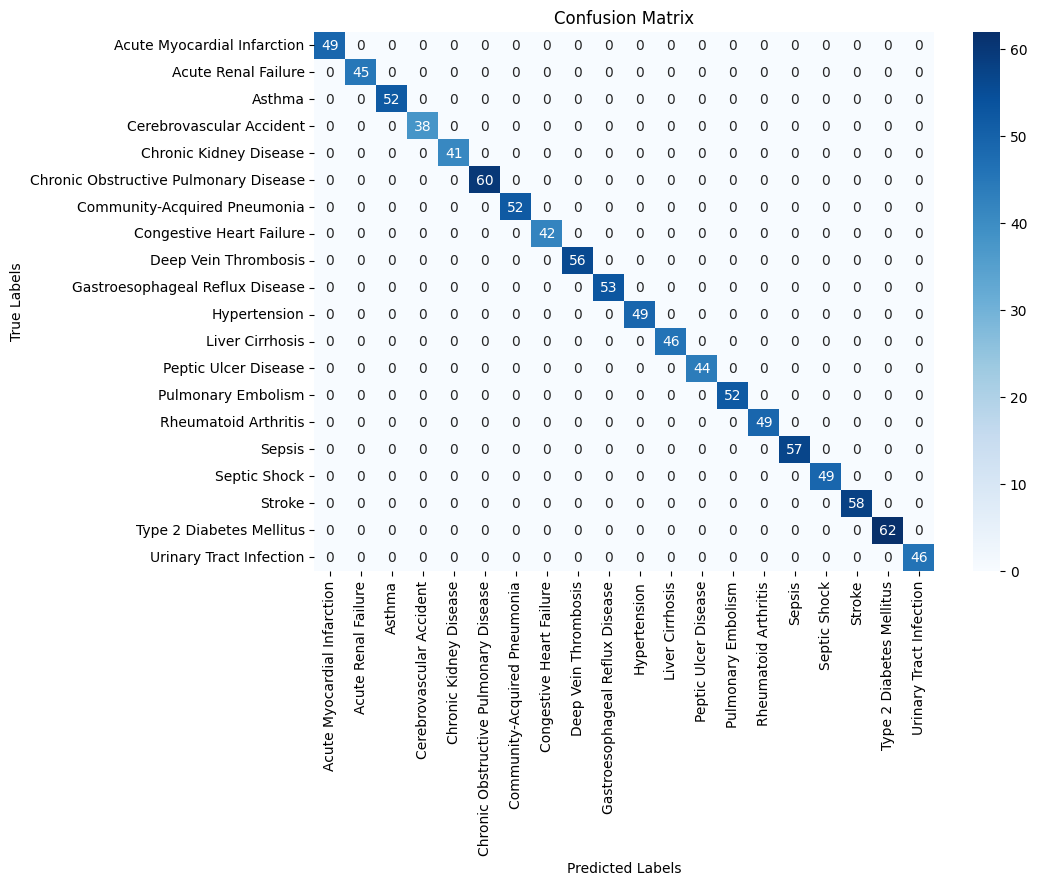

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predictions
predictions, labels, _ = trainer.predict(test_dataset)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)


# Make sure the 'label_encoder.classes_' are passed as string labels
target_names = [str(label) for label in le.classes_]

# Print Classification Report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
# Save the model and tokenizer
trainer.save_model('./patient_model')  # Saves the model
trainer.save_state()  # Saves the training state (e.g., optimizer state, etc.)

tokenizer.save_pretrained('./patient_model')


import pickle
pickle.dump(le,open("label_encoder.pkl",'wb'))



In [26]:
from transformers import BertForSequenceClassification, BertTokenizer
import pickle

# Load the saved model
model = BertForSequenceClassification.from_pretrained('./patient_model')

# Load the saved tokenizer
tokenizer = BertTokenizer.from_pretrained('./patient_model')

# Load the label encoder
with open("label_encoder.pkl", 'rb') as f:
    label_encoder = pickle.load(f)

In [27]:
import torch

# Function to make prediction
def predict_disease(patient_note, model, tokenizer, label_encoder):

    # Tokenize the input patient note
    inputs = tokenizer(patient_note, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Get the predicted label
    predicted_label = torch.argmax(logits, dim=1).item()

    # Convert the predicted label to the corresponding disease name
    predicted_disease = label_encoder.inverse_transform([predicted_label])[0]

    return predicted_disease

In [28]:
 # Example patient note (replace with actual patient notes)
patient_note = "Patient presents with fever, headache, and fatigue. Medical history includes hypertension."

# Make prediction
predicted_disease = predict_disease(patient_note, model, tokenizer, label_encoder)

# Print the prediction
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Acute Renal Failure


In [29]:
 # Example patient note (replace with actual patient notes)
patient_note = "'yearold male presents heartburn regurgitation sour taste mouth especially meals patient selfmedicating overthecounter antacids symptoms persist hour ph monitoring test confirms diagnosis gerd patient started ppi advised avoid trigger foods'"

# Make prediction
predicted_disease = predict_disease(patient_note, model, tokenizer, label_encoder)

# Print the prediction
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Gastroesophageal Reflux Disease


In [31]:
import shutil
from google.colab import files

shutil.make_archive('/content/patient_model', 'zip', './patient_model')


files.download('/content/patient_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>